In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.stats import LombScargle
from scipy import signal
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import scipy.optimize
import glob
from astropy.table import Table,join,vstack,unique
from importlib import reload
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sb
import scipy.stats as st
import wotan

import ogle as o #module

blue = 'cornflowerblue'
navy = 'navy'
purple = 'rebeccapurple'
pink = '#CF6275'
maroon = 'maroon'
import astropy.units as u

In [2]:
from astropy.io import fits

In [3]:
cross = Table.read('sourcefiles.csv')
cross2 = Table.read('part2files.csv')

full = Table.read('smc_x_m03_zar_match_OGLE_v2.ascii',format='ascii')
summ = pd.read_csv('summtab.csv')

cross2 = join(cross2,full,keys='src_n')

In [4]:
phase = pd.read_csv('phasetab.csv')

# List Sources with Known Type II outbursts

9, 7 (SXP 6.85), 5 (SXP 4.78), 60 (SXP 756), 6 (SXP 5.05)

# Look for Lags: Source #9

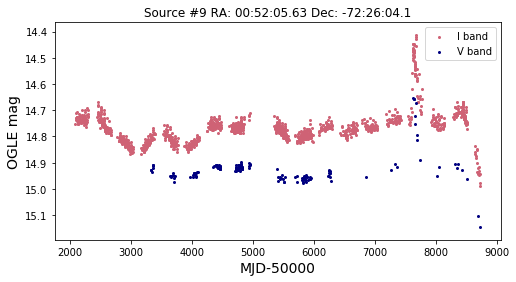

In [5]:
iband,vband = o.getIV(9,cross,stack=True,plot=True)

In [20]:
#Swift LC
lin = np.loadtxt('Swift_LCs/lin198.txt',skiprows=15,comments='!')

In [24]:
time = lin[:,0]
rate = lin[:,3]
rerr = lin[:,5]#rate error

In [46]:
rate[17830:17841]

array([6.313907e-01, 7.974221e-01, 5.206600e+02, 3.373200e+01,
       1.693000e+03, 1.224700e+02, 3.292600e+01, 3.150900e+00,
       3.299800e+00, 4.213600e+00, 3.722300e+00])

In [5]:
3*u.s.to(u.day)

3.472222222222222e-05

In [30]:
date = time*u.s.to(u.day)+3683.731273

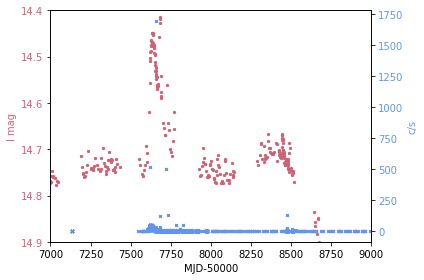

In [40]:
#haven't separated out the upper limits
fig, ax1 = plt.subplots()

color = pink
ax1.set_xlabel('MJD-50000')
ax1.set_ylabel('I mag', color=color)
ax1.scatter(iband['MJD-50000'],iband['I mag'], color=color,s=5)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(14.9,14.4)
ax1.set_xlim(7000,9000)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = blue
ax2.set_ylabel('c/s', color=color)  # we already handled the x-label with ax1
ax2.scatter(date,rate, color=color,s=7,marker='x')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

# Look for Lags: Source 7


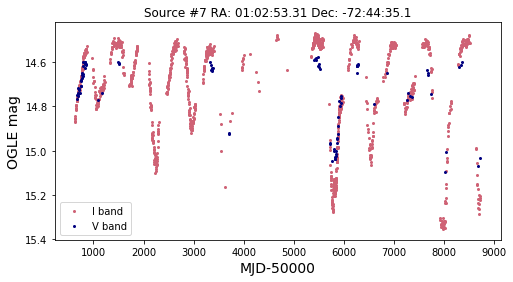

In [4]:
iband,vband = o.getIV(7,cross,stack=True,plot=True)

In [64]:
sx68 = np.loadtxt('Swift_LCs/sxp6.85.txt',skiprows=15,comments='!')
time = sx68[:,0]
rate = sx68[:,3]
rerr = sx68[:,5]

In [76]:
time

array([3.20813004e+08, 3.20813014e+08, 3.20813024e+08, ...,
       3.31979426e+08, 3.31979526e+08, 3.31985326e+08])

In [9]:
#zero point is 55384.535371 MJD
date = time*u.s.to(u.day)+5384.535371

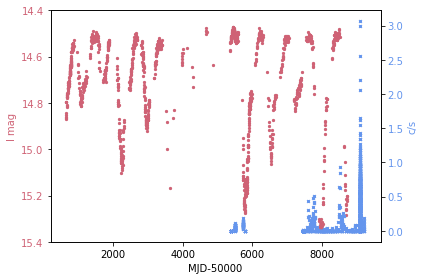

In [10]:
fig, ax1 = plt.subplots()

color = pink
ax1.set_xlabel('MJD-50000')
ax1.set_ylabel('I mag', color=color)
ax1.scatter(iband['MJD-50000'],iband['I mag'], color=color,s=5)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(15.4,14.4)
# ax1.set_xlim(7000,9000)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = blue
ax2.set_ylabel('c/s', color=color)  # we already handled the x-label with ax1
ax2.scatter(date,rate, color=color,s=7,marker='x')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

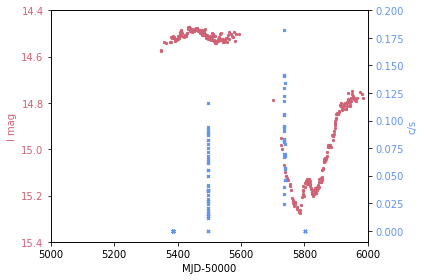

In [11]:
#check if same times as paper, esp since peaks potentially not shown here
fig, ax1 = plt.subplots()

color = pink
ax1.set_xlabel('MJD-50000')
ax1.set_ylabel('I mag', color=color)
ax1.scatter(iband['MJD-50000'],iband['I mag'], color=color,s=5)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(15.4,14.4)
ax1.set_xlim(5000,6000)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = blue
ax2.set_ylabel('c/s', color=color)  # we already handled the x-label with ax1
ax2.scatter(date,rate, color=color,s=7,marker='x')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-.01,0.2)
fig.tight_layout()

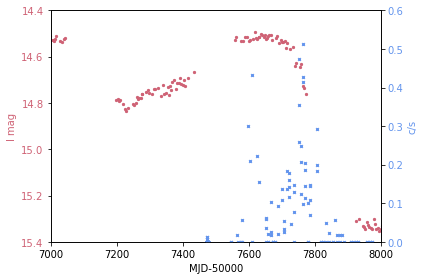

In [12]:
#the two outbursts in a row with once coinciding w/optical peak and one not
fig, ax1 = plt.subplots()

color = pink
ax1.set_xlabel('MJD-50000')
ax1.set_ylabel('I mag', color=color)
ax1.scatter(iband['MJD-50000'],iband['I mag'], color=color,s=5)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(15.4,14.4)
ax1.set_xlim(7000,8000)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = blue
ax2.set_ylabel('c/s', color=color)  # we already handled the x-label with ax1
ax2.scatter(date,rate, color=color,s=7,marker='x')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,0.6)
fig.tight_layout()

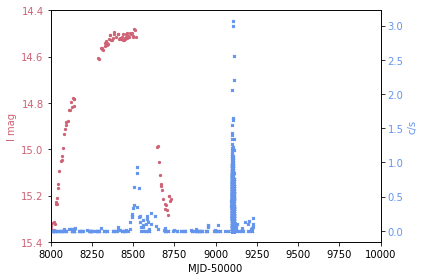

In [13]:
#first lags the optical peak and then no coverage
fig, ax1 = plt.subplots()

color = pink
ax1.set_xlabel('MJD-50000')
ax1.set_ylabel('I mag', color=color)
ax1.scatter(iband['MJD-50000'],iband['I mag'], color=color,s=5)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(15.4,14.4)
ax1.set_xlim(8000,10000)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = blue
ax2.set_ylabel('c/s', color=color)  # we already handled the x-label with ax1
ax2.scatter(date,rate, color=color,s=7,marker='x')
ax2.tick_params(axis='y', labelcolor=color)
# ax2.set_ylim(0,3)
fig.tight_layout()

#### try using evt file

In [5]:
import astropy.visualization.hist as bhist

In [6]:
def readevt(file,index=1,header=False):
    hdu_list = fits.open(file, memmap=True)
    if header: tab = hdu_list[index].header
    else: tab = Table(hdu_list[index].data)
    return tab

In [7]:
pcfile = 'Swift_LCs/sxp6.85pcsourcetotal.evt'
pc = readevt(pcfile)

In [8]:
tint = readevt(pcfile,index=2)
head = readevt(pcfile,index=0,header=True)

In [9]:
def binevt(tab,tint,head,n=100):
    '''
    tab: evt table
    tint: exposure interval table
    n: number of bins'''
    tbins = np.concatenate((tint['START'],tint['STOP']))
    tbins = np.sort(tbins)
    hist = bhist(tab['TIME'],bins=tbins,histtype='step',color='maroon',alpha=.4)
    plt.close()
    bin_wid = hist[1][1:]-hist[1][:-1]
    #total counts in each bin
    #time to use for bin point is middle point in time of bin
    bint = hist[1][:-1]+(bin_wid/2)
    counts = hist[0]
    #take every other bin since the others are between STOP and START
    bint = bint[::2] 
    counts = counts[::2]
    bin_wid = bin_wid[::2]
    #count rate is counts in bin divided by the total time of that bin
    cr = (counts)/bin_wid
    if n==1: 
        mjdref = head['MJDREFI']+head['MJDREFF']-50000
        daybin = bint*u.s.to(u.day) + (mjdref)
        return daybin,cr
    crbin = np.array_split(cr,n)
    binw = np.array_split(bin_wid,n)
    tms = np.array_split(bint,n)
    countsbin = np.zeros(len(crbin))
    bwb = np.zeros(len(crbin))
    tbin = np.zeros(len(crbin))
    for i in range(len(crbin)):
        countsbin[i] = np.sum(crbin[i])
        bwb[i] = np.sum(binw[i])
        #mean time within bin adopted as time for bin
        tbin[i] = np.mean(tms[i])
    mjdref = head['MJDREFI']+head['MJDREFF']-50000
    daybin = tbin*u.s.to(u.day) + (mjdref)
    return daybin,countsbin

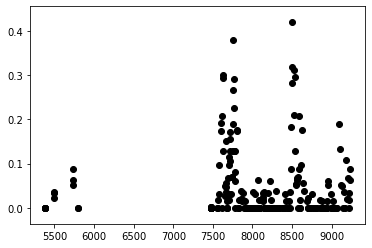

In [10]:
day,cr = binevt(pc,tint,head,n=1000)
plt.scatter(day,cr,color='black')

In [165]:
np.mean(tint['STOP']-tint['START'])

166.94524451250933

In [161]:
#add WT mode file
wtfile = 'Swift_LCs/sxp6.85wtsourcetotal.evt'
wt = readevt(wtfile)
wtint = readevt(wtfile,index=2)
wthead = readevt(wtfile,index=0,header=True)
wtday,wtcr = binevt(wt,wtint,wthead,n=1)

probably would need to use bins *smaller* than exposure intervals to match the automatic LC
- for now, just binned PC mode more

In [164]:
np.mean(wtint['STOP']-wtint['START'])

807.730266491572

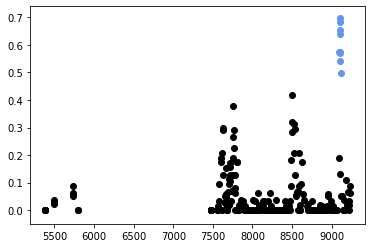

In [167]:
plt.scatter(day,cr,color='black')
plt.scatter(wtday,wtcr,color=blue)

# Look for Lags: Source 5


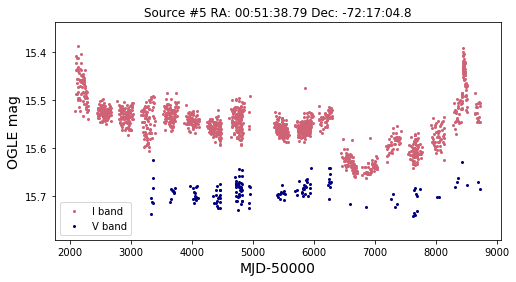

In [11]:
iband,vband = o.getIV(5,cross,stack=True,plot=True)

In [12]:
#swift LC
sx47 = np.loadtxt('Swift_LCs/sxp4.78.txt',skiprows=15,comments='!')
time = sx47[:,0]
rate = sx47[:,3]
rerr = sx47[:,5]

In [19]:
days = time*u.s.to(u.day)+3683.731273

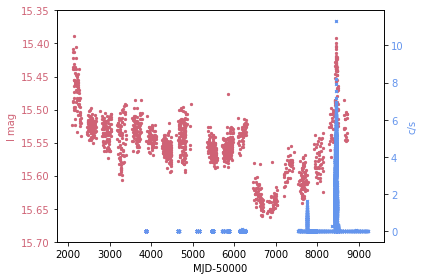

In [23]:
fig, ax1 = plt.subplots()

color = pink
ax1.set_xlabel('MJD-50000')
ax1.set_ylabel('I mag', color=color)
ax1.scatter(iband['MJD-50000'],iband['I mag'], color=color,s=5)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(15.7,15.35)
# ax1.set_xlim(8000,10000)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = blue
ax2.set_ylabel('c/s', color=color)  # we already handled the x-label with ax1
ax2.scatter(days,rate, color=color,s=7,marker='x')
ax2.tick_params(axis='y', labelcolor=color)
# ax2.set_ylim(0,3)
fig.tight_layout()

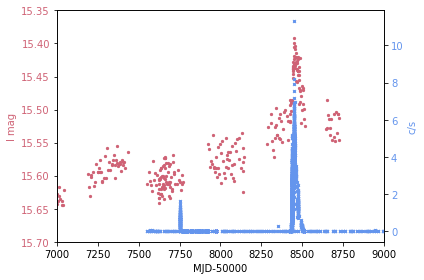

In [24]:
fig, ax1 = plt.subplots()

color = pink
ax1.set_xlabel('MJD-50000')
ax1.set_ylabel('I mag', color=color)
ax1.scatter(iband['MJD-50000'],iband['I mag'], color=color,s=5)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(15.7,15.35)
ax1.set_xlim(7000,9000)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = blue
ax2.set_ylabel('c/s', color=color)  # we already handled the x-label with ax1
ax2.scatter(days,rate, color=color,s=7,marker='x')
ax2.tick_params(axis='y', labelcolor=color)
# ax2.set_ylim(0,3)
fig.tight_layout()

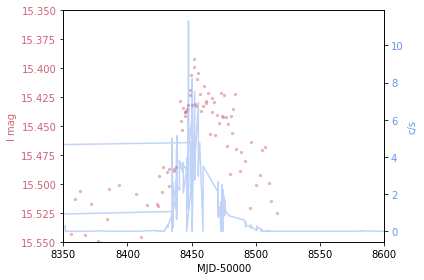

In [34]:
fig, ax1 = plt.subplots()

color = pink
ax1.set_xlabel('MJD-50000')
ax1.set_ylabel('I mag', color=color)
ax1.scatter(iband['MJD-50000'],iband['I mag'], color=color,s=5,alpha=0.4)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(15.55,15.35)
ax1.set_xlim(8350,8600)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = blue
ax2.set_ylabel('c/s', color=color)  # we already handled the x-label with ax1
ax2.plot(days,rate, color=color,alpha=0.4)
ax2.tick_params(axis='y', labelcolor=color)
# ax2.set_ylim(0,3)
fig.tight_layout()

# Periodicity Searches
- change best period column for these sources

ATel for Source #63, which has *Type I* outbursts: 655.9 +/- 0.2 d

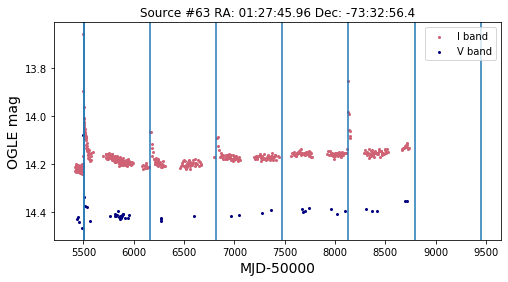

In [79]:
iband,vband = o.getIV(63,cross,stack=True,plot=True)
plt.axvline(5510)
for i in range(7):
    plt.axvline(655.9*i+5510)

(14.3, 13.6)

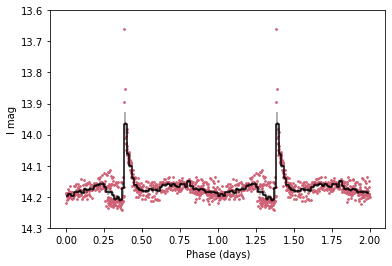

In [80]:
#fold
pd = 655.9
plt.scatter((iband['MJD-50000']%pd)/pd,iband['I mag'],s=3,color=pink)
plt.scatter(1+(iband['MJD-50000']%pd)/pd,iband['I mag'],color=pink,s=3)
o.phasestep(iband,pd,60,divide=True)
plt.ylim(14.3,13.6)

(14.3, 13.6)

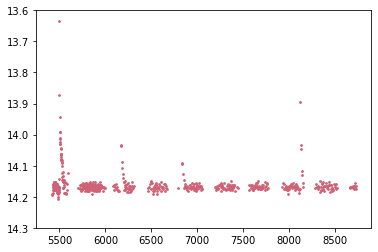

In [81]:
o.splinedetrend(iband,window=300)
plt.scatter(iband['MJD-50000'],iband['I detrend'],color=pink,s=3)
plt.ylim(14.3,13.6)

(14.3, 13.6)

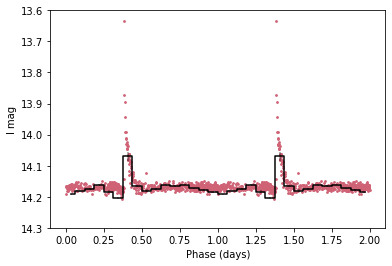

In [82]:
#fold after detrending
pd = 655.9
plt.scatter((iband['MJD-50000']%pd)/pd,iband['I detrend'],s=3,color=pink)
plt.scatter(1+(iband['MJD-50000']%pd)/pd,iband['I detrend'],color=pink,s=3)
o.phasestep(iband,pd,16,divide=True)
plt.ylim(14.3,13.6)

In [83]:
row = summ[summ['src_n']==63]
row['best period'] = 656
summ[summ['src_n']==63] = row

In [84]:
summ[summ['src_n']==63]['best period']

58    656.0
Name: best period, dtype: float64

In [85]:
srcn = 63
pdict = o.combine(srcn,cross,full,iband=iband,pd=656,pbins=16,det=True,close=True,testbins=False)
row = phase[phase['src_n']==srcn]
#loop through keys in pdict and add quantities to df
for d in list(pdict.keys()):
    row[d] = pdict[d]
phase[phase['src_n']==srcn] = row

### search source #60
393.1 +/- 0.4 Schmidtke et al. 2013

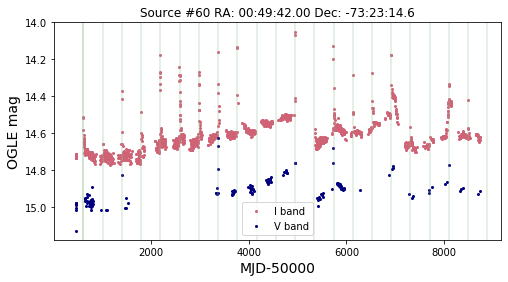

In [86]:
iband,vband = o.getIV(60,cross,stack=True,plot=True)
plt.axvline(625,color='darkseagreen',alpha=0.3)
for i in range(22):
    plt.axvline(393.1*i+625,color='darkseagreen',alpha=0.3)

(15, 14)

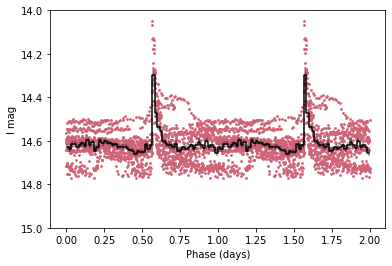

In [87]:
#fold
pd = 393.1
plt.scatter((iband['MJD-50000']%pd)/pd,iband['I mag'],s=3,color=pink)
plt.scatter(1+(iband['MJD-50000']%pd)/pd,iband['I mag'],color=pink,s=3)
o.phasestep(iband,393.1,60,divide=True)
plt.ylim(15,14)

**for source like this, amplitude strongly affected by bin number since spike so narrow**

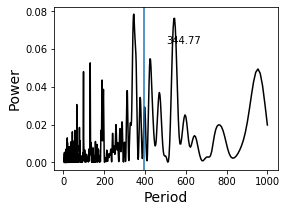

In [88]:
o.periodogram(iband,maxp=1000)
plt.axvline(393) #periodograms just don't really work for this type of source

(15, 14)

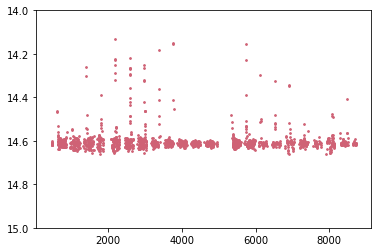

In [89]:
o.splinedetrend(iband,window=300)
plt.scatter(iband['MJD-50000'],iband['I detrend'],color=pink,s=3)
plt.ylim(15,14)

(15, 14)

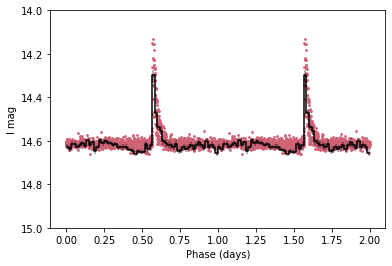

In [90]:
#fold detrended
pd = 393.1
plt.scatter((iband['MJD-50000']%pd)/pd,iband['I detrend'],s=3,color=pink)
plt.scatter(1+(iband['MJD-50000']%pd)/pd,iband['I detrend'],color=pink,s=3)
o.phasestep(iband,pd,60,divide=True)
plt.ylim(15,14)

In [75]:
row = summ[summ['src_n']==60]
row['best period'] = 393
summ[summ['src_n']==60] = row

# Update phase and summary tables

#### update phase table by using these periods in fold

In [91]:
srcn = 60
pdict = o.combine(srcn,cross,full,iband=iband,pd=393,pbins=16,det=True,close=True,testbins=False)
row = phase[phase['src_n']==srcn]
#loop through keys in pdict and add quantities to df
for d in list(pdict.keys()):
    row[d] = pdict[d]
phase[phase['src_n']==srcn] = row

In [93]:
phase[phase['src_n']==63]

,src_n,period,amp,phase diff,phase max,phase min,shape,diff mean,mean,skew,kurtosis,symm sum,mean err
58,63,656.0,0.104757,0.9375,0.34375,0.40625,not FRED,0.010035,14.162283,-3.571613,10.87291,0.001011,0.002232


In [94]:
phase.to_csv('phasetab.csv',index=False)

In [41]:
summ.to_csv('summtab.csv',index=False)